In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import librosa
import math
import re
import os
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
import xlwt
from datetime import datetime

# Turn off TF verbose logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


In [0]:
import numpy as np
train_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_train_input.npy')
train_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_train_target.npy')
dev_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_validation_input.npy')
dev_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_validation_target.npy')
test_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_test_input.npy')
test_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_test_target.npy')


# genre_features.load_deserialize_data()

# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9, epsilon=1e-8, decay=0.
# SGD    : lr=0.01, momentum=0., decay=0.
opt = Adam()

batch_size = 35
# nb_epochs = 5,10,20,50,100,200,400




Instructions for updating:
Colocations handled automatically by placer.


In [0]:

trainX = np.delete(train_X,[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197],2)
devX = np.delete(dev_X,[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197],2)
testX = np.delete(test_X,[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197],2)


trainY = train_Y
devY = dev_Y
testY = test_Y

input_shape = (trainX.shape[1], trainX.shape[2])
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=trainY.shape[1], activation='softmax'))

print("Compiling ...")
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()


# trainY = model.predict(trainX, batch_size=batch_size, verbose=1, steps=None)
# devY = model.predict(devX, batch_size=batch_size, verbose=1, steps=None)
# testY = model.predict(testX, batch_size=batch_size, verbose=1, steps=None)



print ('====================================================================')
print("Training X shape: " + str(trainX.shape))
print("Training Y shape: " + str(trainY.shape))
print("Dev X shape: " + str(devX.shape))
print("Dev Y shape: " + str(devY.shape))
print("Test X shape: " + str(testX.shape))
print("Test Y shape: " + str(testY.shape))

Build LSTM RNN model ...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Compiling ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 128)          83968     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 104,708
Trainable params: 104,708
Non-trainable params: 0
_________________________________________________________________
Training X shape: (280, 128, 35)
Training Y shape: (280, 4)
Dev X shape: (120, 128, 35)
Dev Y shape: (120, 4)
Test X shape: (120, 128, 35)
Test Y shape: (120, 4)


In [0]:
print("Training ...")
model.fit(trainX, trainY, batch_size=batch_size, epochs=400)

scorex, accuracyx = model.evaluate(devX, devY, batch_size=batch_size, verbose=1)
print("Dev loss:  ", scorex)
print("Dev accuracy:  ", accuracyx)
    
scored, accuracyd = model.evaluate(testX, testY, batch_size=batch_size, verbose=1)
print("Test loss:  ", scored)
print("Test accuracy:  ", accuracyd)

Training ...
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
280/280 [==============================] - 5s 18ms/step - loss: 1.4050 - acc: 0.2821
Epoch 2/400
280/280 [==============================] - 3s 10ms/step - loss: 1.2985 - acc: 0.3464
Epoch 3/400
280/280 [==============================] - 3s 10ms/step - loss: 1.2303 - acc: 0.4857
Epoch 4/400
280/280 [==============================] - 3s 10ms/step - loss: 1.1085 - acc: 0.5500
Epoch 5/400
280/280 [==============================] - 3s 10ms/step - loss: 1.0398 - acc: 0.5929
Epoch 6/400
280/280 [==============================] - 3s 10ms/step - loss: 0.9271 - acc: 0.6250
Epoch 7/400
280/280 [==============================] - 3s 10ms/step - loss: 0.8943 - acc: 0.6429
Epoch 8/400
280/280 [==============================] - 3s 10ms/step - loss: 0.8757 - acc: 0.6071
Epoch 9/400
280/280 [==============================] - 3s 10ms/step - loss: 0.8708 - acc: 0.6107
Epoch 10/400
280/280 [==============================] - 3s 10ms/st

120/120 [==============================] - 1s 5ms/step


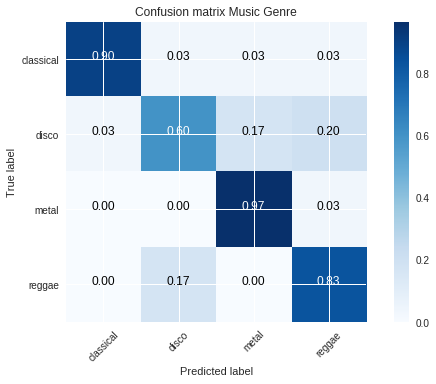

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

true = testY
pred = model.predict(testX, batch_size=batch_size, verbose=1, steps=None)


genre_list = ['classical', 'disco', 'metal', 'reggae']
matrix = confusion_matrix(true.argmax(axis=1), pred.argmax(axis=1))
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues, normalize=False):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
plot_confusion_matrix(matrix, classes=genre_list, normalize=True,
                      title='Confusion matrix Music Genre')

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(matrix, classes=genre_features.genre_list,
#                       title='Confusion matrix, without normalization')

plt.show()